# Kernel SVM

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC
import mglearn
%matplotlib inline

## SVM(Support Vector Machine)

Text(0,0.5,'$X_2$')

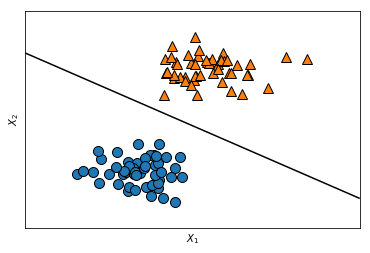

In [12]:
X, y = make_blobs(n_features=2, centers=2, random_state=2)
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")

### margin 
위 처럼 두 범주를 나누는 분류 문제를 푸는 경우 여러 직선들로 분류가 가능하다. 그러나 더 그 여러 직선들 중 더 나은 분류선(분류경계면)을 택하는 경우 두 범주를 더 여유있게 나누는 분류선을 택할 것이다. 그 때 각 분류 선들이 범주를 여유있게 가르는 정도를 구하는 방법은 각 범주에서 선과 가장 가까운 원소 사이의 거리들의 합을 구하는 것이며, 이것을 마진(margin)이라고 한다. 그리고 SVM은 마진의 크기가 가장 큰 분류선(분류경계면)을 찾는 기법이다.

이러한 마진(margin)의 크기에 영향을 주는 원소(관측치)들을 서포트 벡터(support vector)라고 한다.

## C-SVM

SVM은 두 범주를 잘 분류하면서 마진(margin)이 최대화 된 분류경계면 즉, 초평면(hyperplane)을 찾는 기법이다. 이때 기본적으로 선형분류를 하게 된다. 하지만 아래 그림처럼 하나의 직선으로는 두 범주를 완벽하게 분류하기 어려운 경우도 많다.

Text(0,0.5,'feature 2')

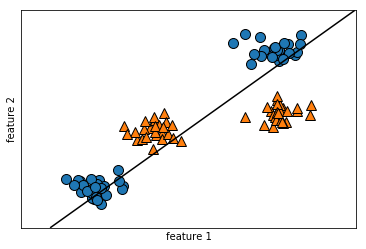

In [14]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

이 경우에는 두 가지 해결 방법이 있다. 첫번째는 \*minus-plane과 \*plus-plane 사이(즉, 마진) 안에 관측치(support vector)가 존재할 수 있도록 제약을 완화하는 방법이다. 두번째는 분류경계면을 아예 비선형 모양으로 만드는 방법이다. 이때 C-SVM은 첫번째 방법을 사용한 기법이고, Kernel-SVM은 두번째 방법을 사용한 기법이다.

---
* minus-plane: 초평면과 평행인 아래쪽(minus) 평면(직선)
* plus-plane: 초평면과 평행인 위쪽(plus) 평면(직선)

기존 SVM은 마진 안에 관측치가 들어 올 수 없다. 왜냐하면 마진 폭이 줄어드는 것을 감수하더라고 마진 안에 관측치가 없도록 마진을 설정하기 때문이다. 그러나 C-SVM은 마진 안에 관측치의 존재를 허용한다. 이것을 **Soft-margin**이라고 한다.

그러나 이 방법도 역시 선형분류기의 하나이기 때문에 완벽한 분류는 불가능하다.

## Kernel-SVM
Kernel-SVM은 위 그림과 같이 하나의 직선으로는 분류가 불가능한 경우를 해결하기 위해 제안된 방법이다.

Text(0.5,0,'feature 2 ** 2')

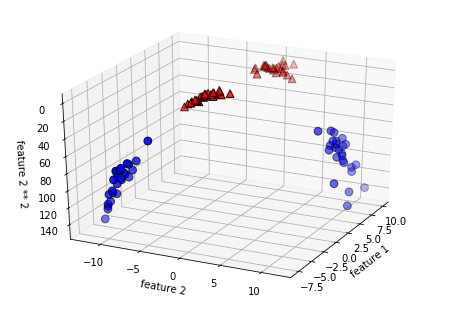

In [16]:
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y==0인 포인트를 먼저 y==1인 포인트를 다음에 그린다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")
ax.set_zlabel("feature 2 ** 2")

Text(0.5,0,'feature 2 ** 2')

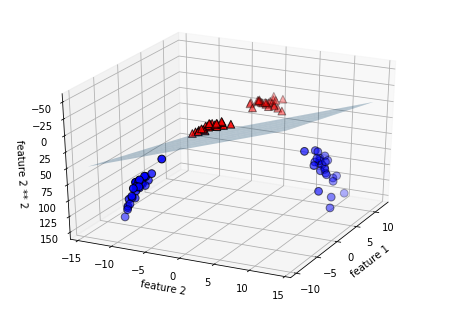

In [17]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature 1")
ax.set_ylabel("feature 2")
ax.set_zlabel("feature 2 ** 2")

Text(0,0.5,'feature 2')

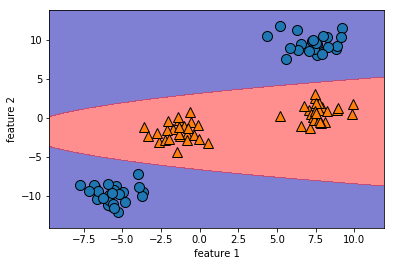

In [18]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

위 그림들로 보여지는 일련의 과정이 바로 Kernel-SVM의 핵심 아이디어다. 현재 주어진 feature 차원에서는 분류가 불가능하다면 고차원 공간에서 두 범주를 분류하는 초평면을 만들도록 한다. 그러나 이 과정을 그대로 진행하는 경우 연산량이 폭증하게 된다. 왜냐하면 모든 관측치(원소)들에 대해 고차원으로 매핑하고 이를 다시 내적(inner product)해야 하기 때문이다. 이러한 이유로 연산량이 폭증하는 것을 줄이기 위해 매핑과 내적을 한번에 진행하기 위해 도입된 것이 **커널(Kernel)**이다.  

커널(Kernel)에는 선형, 다항식과 가우시안(:=RBF) 등이 있다.

**선형 커널**  
선형 커널(linear kernel)은 데이터를 전혀 변환하지 않는다.

**다항 커널**  
다항 커널(polynomial kernel)은 데이터에 간단한 비선형 변환을 더한다.

**시그모이드 커널**  
시그모이드 커널(sigmoid kernel)은 시그모이드 활성 함수를 사용한 신경망과 유사한 SVM모델을 만든다. 

**가우시안 RBF 커널**  
가우시안 RBF 커널(Gaussian RBF kernel)은 RBF 신경망과 유사하다. RBF 커널은 많은 유형의 데이터에 잘 작동된다.

### 장점
* 분류 또는 수치 예측 문제에 사용될 수 있다.  
* 잡음에 거의 영향을 받지 않으며, 과적합도 쉽게 일어나지 않는다.  
* 신경망을 사용하는 것보다 쉽다.  
* 정확도가 높다.  

### 단점
* 최고의 모델을 찾기 위해 커널과 모델 파라미터의 다양한 조합을 테스트해야 한다.  
* 훈련이 느릴 수 있으며, 특히 입력 데이터셋이 아주 많은 특징(feature)이나 예시를 갖는 경우 느리다.  
* 해석하기 어렵고 복잡한 블랙박스 모델이 만들어진다.  

# SVM 전처리

## Feature Scaling
